# sometime sept22
need to probably fix easy stuff, but this checks how well CCA does for an entire folder of data

In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
from src.folder_handler import *
from src.cort_processor import *
from src.cca_processor import *
from src.tdt_support import *
from src.plotter import *
from src.decoders import *
import pickle
import scipy as spicy
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
from src.wiener_filter import *
from matplotlib.pyplot import cm
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
import os

In [2]:
path = '/home/diya/Documents/rat-fes/data/filipe_data/N5'

In [3]:
filenames = os.listdir(path)
print(filenames)

['N5_171130_No Obstacles_s.mat', 'N5_171016_No Obstacles_s.mat', 'N5_171001_No Obstacles_s.mat', 'N5_170929_No Obstacles_s.mat']


In [4]:
temp_datasets = []
temp_var_names = []

for file in filenames:
    temp_datasets.append(path+'/'+file)
    temp_var_names.append(file.split('_')[0]+file.split('_')[1])

datasets = sorted(temp_datasets)
var_names = sorted(temp_var_names)

In [5]:
cort_dict = {}
for i in range(len(datasets)):
    cort_dict[var_names[i]] = CortProcessor(datasets[i])

this is filipe data i belive
this is filipe data i belive
this is filipe data i belive
this is filipe data i belive


/home/diya/anaconda3/envs/rat-fes/lib/python3.7/site-packages/scipy/io/matlab/mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [6]:
cca_dict = {}
for i in range(1, len(var_names)):
    print(var_names[0], var_names[i])
    cca_dict[var_names[i]] = CCAProcessor(cort_dict[var_names[0]], cort_dict[var_names[i]])


N5170929 N5171001
(12050,)
(12039,)
should be good to align
(10267, 11)
(10267, 5)
(10267, 23)
(10267, 5)
N5170929 N5171016
(12050,)
(12127,)
should be good to align
(8680, 11)
(8680, 5)
(8680, 22)
(8680, 5)
N5170929 N5171130
(12050,)
(12051,)
should be good to align
(9543, 11)
(9543, 5)
(9543, 23)
(9543, 5)


In [9]:
proc_vaf_scores = []
proc_y_list = []

#temp = np.average(cca_dict[var_names[1]].data['cp1']['proc_vaf'], 1)
#proc_vaf_scores.append(temp)

#temp = cca_dict[var_names[1]].data['cp1']['proc_y']
#proc_y_list.append(temp)

for i in range(1, len(var_names)):
    #temp = np.average(cca_dict[var_names[i]].data['cp2']['proc_vaf'],1)
    #proc_vaf_scores.append(temp)
    
    temp = cca_dict[var_names[i]].data['cp2']['proc_y']
    proc_y_list.append(temp)
        
    temp = cca_dict[var_names[1]].data['cp1']['proc_y'].shape[0]
    if proc_y_list[0].shape[0] > temp:
        proc_y_list[0] = temp
#proc_vaf_scores.append(cca_dict[var_names[0]].cp1.vaf

ValueError: shape mismatch: objects cannot be broadcast to a single shape

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
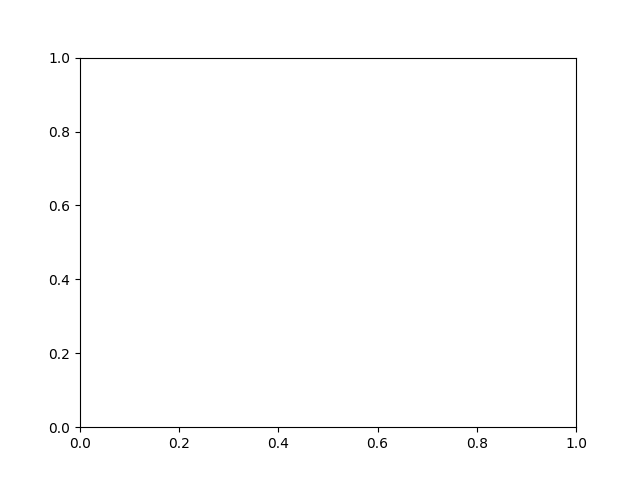

In [10]:
limbfoot_proc_vaf_scores = []
knee_proc_vaf_scores = []
for score in proc_vaf_scores:
    limbfoot_proc_vaf_scores.append(score[1])
    knee_proc_vaf_scores.append(score[3])

x = np.arange(len(var_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, limbfoot_proc_vaf_scores, width, label='limbfoot')
rects2 = ax.bar(x + width/2, knee_proc_vaf_scores, width, label='knee')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('vaf')
ax.set_title('processed vafs')
ax.set_xticks(x)
ax.set_xticklabels(var_names)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)


In [12]:
lowest_num_dimensions = 33


for i in range(1, len(var_names)):
    temp, nada, nada = cca_dict[var_names[i]].apply_PCA()
    lowest_num_dimensions = min(lowest_num_dimensions, temp)
    if temp==lowest_num_dimensions:
        low_dim = var_names[i]
    
print(str(low_dim) + ': ' + str(lowest_num_dimensions))

TypeError: '<' not supported between instances of 'tuple' and 'int'

In [ ]:
lowest_num_dimensions=33
for i in range(0, len(var_names)):
    temp = cort_dict[var_names[i]].data['rates'][0].shape[1]
    lowest_num_dimensions = min(lowest_num_dimensions, temp)
    if temp==lowest_num_dimensions:
        low_dim = var_names[i]
print(str(low_dim) + ': ' + str(lowest_num_dimensions))

In [13]:
lowest_num_dimensions=8

In [15]:
pca_x_list = []

for i in range(1, len(var_names)):
    nada, temp_x = cca_dict[var_names[i]].apply_PCA(preset_num_components = lowest_num_dimensions)
    pca_x_list.append(temp_x)
    
nada, temp_x = cca_dict[var_names[1]].apply_PCA(preset_num_components = lowest_num_dimensions)
pca_x_list.insert(0, temp_x)

In [16]:
pca_h_matrices = []
pca_vaf_list = []
proc_y_list_format = []
pca_x_list_format = []
for i in range(len(pca_x_list)):
    print(pca_x_list[i].shape, proc_y_list[i].shape)
    temp_x, temp_y = format_data(pca_x_list[i], proc_y_list[i])
    pca_x_list_format.append(temp_x)
    proc_y_list_format.append(temp_y)
    
    temp_h, temp_vaf, nada, nada = decode_kfolds(temp_x, temp_y)
    pca_h_matrices.append(temp_h)
    pca_vaf_list.append(np.round((np.average(temp_vaf,1)), 2))
    
    

AttributeError: 'tuple' object has no attribute 'shape'

In [ ]:
limbfoot_pca_vaf_scores = []
knee_pca_vaf_scores = []
for score in pca_vaf_list:
    limbfoot_pca_vaf_scores.append(score[1])
    knee_pca_vaf_scores.append(score[3])

x = np.arange(len(var_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, limbfoot_pca_vaf_scores, width, label='limbfoot')
rects2 = ax.bar(x + width/2, knee_pca_vaf_scores, width, label='knee')

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_ylabel('vaf')
ax.set_title('pca, num dimensions: ' + str(lowest_num_dimensions))
ax.set_xticks(x)
ax.set_xticklabels(var_names)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

In [ ]:
fixed_decoder = pca_h_matrices[0]
fixed_decoder_vaf_list = []
for i in range(len(pca_x_list_format)):
    nada, temp_vaf, nada, nada, = decode_kfolds(pca_x_list_format[i], proc_y_list_format[i], preset_h = fixed_decoder)
    fixed_decoder_vaf_list.append(np.round((np.average(temp_vaf, 1)), 2))

In [ ]:
limbfoot_fixed_vaf_scores = []
knee_fixed_vaf_scores = []
for score in fixed_decoder_vaf_list:
    limbfoot_fixed_vaf_scores.append(score[1])
    knee_fixed_vaf_scores.append(score[3])

x = np.arange(len(var_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, limbfoot_fixed_vaf_scores, width, label='limbfoot')
rects2 = ax.bar(x + width/2, knee_fixed_vaf_scores, width, label='knee')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('vaf')
ax.set_title('pca, but only using decoder1')
ax.set_xticks(x)
ax.set_xticklabels(var_names)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

In [ ]:
cca_x_list = []
cca_x_list_format = []

cca_x_list.append(pca_x_list[0])
cca_x_list_format.append(pca_x_list_format[0])

for i in range(1, len(var_names)):
    temp_cca = cca_dict[var_names[i]]
    temp_x1 = temp_cca.data['cp1']['pca_x']
    temp_x2 = temp_cca.data['cp2']['pca_x']
    nada, temp_x_hat = temp_cca.apply_CCA(temp_x1, temp_x2)
    cca_x_list.append(temp_x_hat)
    
    temp_x_format, nada = format_data(temp_x_hat, proc_y_list[i])
    cca_x_list_format.append(temp_x_format)  

In [ ]:
cca_fixed_decoder_vaf_list = []

for i in range(len(cca_x_list_format)):
    nada, temp_vaf, nada, nada, = decode_kfolds(cca_x_list_format[i], proc_y_list_format[i], preset_h = fixed_decoder)
    cca_fixed_decoder_vaf_list.append(np.round((np.average(temp_vaf, 1)),2))

In [ ]:
cca_fixed_decoder_vaf_list

In [ ]:
limbfoot_cca_vaf_scores = []
knee_cca_vaf_scores = []
for score in cca_fixed_decoder_vaf_list:
    limbfoot_cca_vaf_scores.append(score[1])
    knee_cca_vaf_scores.append(score[3])

x = np.arange(len(var_names))  # the label locations
width = 0.35  # the width of the barswhat is an integer in python

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, limbfoot_cca_vaf_scores, width, label='limbfoot')
rects2 = ax.bar(x + width/2, knee_cca_vaf_scores, width, label='knee')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('vaf')
ax.set_title('cca, using decoder #1 only')
ax.set_xticks(x)
ax.set_xticklabels(var_names)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

In [ ]:
plot_dict = {}
plot_dict['own_decoder'] = limbfoot_pca_vaf_scores
plot_dict['fixed_decoder'] = limbfoot_fixed_vaf_scores
plot_dict['cca_fixed_decoder'] = limbfoot_cca_vaf_scores

index = var_names

df = pd.DataFrame(data=plot_dict, index=index)

  
# plot grouped bar chart
ax = df.plot.bar(rot=15)
for container in ax.containers:
    ax.bar_label(container)



# state space visualization

In [ ]:
x_pca_plot = []

for i in range(len(var_names)):
    x_pca_plot.append(cca_dict[var_names[1]].back_to_gait(pca_x_list[i]))

In [ ]:
plot_all(x_pca_plot, labels=var_names, subsample=1)

In [ ]:
x_cca_plot = []

for i in range(len(var_names)):
    x_cca_plot.append(cca_dict[var_names[1]].back_to_gait(cca_x_list[i]))

In [ ]:
plot_all(x_ca_plot, labels=var_names, subsample=1)

In [ ]:
plot_all([x_cca_plot[1]], labels = [var_names[1]])

# scrapyard

In [ ]:
x = pca_x_list[0]
y = proc_y_list[0]

In [ ]:
x_ret, y_ret = cca_dict[var_names[1]].back_to_gait(x,y)

In [ ]:
for thing in x_ret:
    x_ret

In [ ]:
avg_samples = cca_dict[var_names[1]].cp1.avg_gait_samples

In [ ]:
test = np.reshape(x, (int(x.shape[0]/avg_samples), avg_samples, x.shape[1]), 'C')

In [ ]:
x.shape[0] / avg_samples

In [ ]:
x.shape[0]/avg_samples